## Giving Microsoft a Solid Start in the Movie Industry

***

# ![example](images/event-banner-microsoft-o365.jpg)

### Overview

Here at Microsoft, we see all the big companies create original video content. We want to get in on the lights, camera, and action. We've gone as far as creating a new movie studio, and I explored what types of films are currently doing the best at the box office.

I've gone ahead and translated these findings into actionable insights, which we at Microsoft's budding movie studio can utilize to be the new quintessential standard of the movie industry.

## Business Problem
![img](./images/banner-949931_960_720.jpg)

Microsoft's core business problem is the current unknown pathway to creating successful movies with our new movie studio. 

We want our endeavors to be as successful as possible. This way, we can ensure a stable future and have consistent expectations for our projects. We want to manage our success every step of the way, along with at the onset.

## Data

I have downloaded usable movie data from websites like [IMDB](https://www.imdb.com/), [Box Office Mojo](https://www.boxofficemojo.com/), and [The Numbers](https://www.the-numbers.com/). I have essentially created a data frame that has information on over 2000 different movie titles. From this dataset, I was able to condense the information needed for presentation in a meaningful manner.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
# glob is a file search tool. Gives you a search string
# os has lots of operating system based functions attached. 
# os.listdir() is pretty much ls in linux
import glob, os
fpath = 'zipped_data/'
os.listdir(fpath)

['imdb.title.basics.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.crew.csv.gz',
 'bom.movie_gross.csv.gz',
 'tn.movie_budgets.csv.gz',
 'tmdb.movies.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz']

In [3]:
query = fpath + '*.gz'

file_list = glob.glob(query)
file_list

['zipped_data/imdb.title.basics.csv.gz',
 'zipped_data/imdb.title.principals.csv.gz',
 'zipped_data/imdb.title.crew.csv.gz',
 'zipped_data/bom.movie_gross.csv.gz',
 'zipped_data/tn.movie_budgets.csv.gz',
 'zipped_data/tmdb.movies.csv.gz',
 'zipped_data/rt.movie_info.tsv.gz',
 'zipped_data/rt.reviews.tsv.gz',
 'zipped_data/imdb.title.akas.csv.gz',
 'zipped_data/imdb.title.ratings.csv.gz',
 'zipped_data/imdb.name.basics.csv.gz']

In [4]:
tables = {} # Creates an empty dictionary in which our for-loop will fill information into

for file in file_list:
    print('---'*20) 
    # creates dividers in order to display when a different file gets loaded
    
    file_name = file.replace('zipped_data/','').replace('.', '_')
    # takes away the 'zippedData/' prefix from the file name
    # changes periods into underscores in order to be seamlessly worked with in python    
    
    print(file_name) # shows how a filename will appear on its own
    
    if '.tsv.gz' in file:
        temp_df = pd.read_csv(file, sep='\t', encoding='latin-1') 
        # enables python to read the tsv
        # if you get a parsing error: simply include "encoding='latin-1'"
    else:
        temp_df = pd.read_csv(file)
    display(temp_df.head(3), temp_df.tail(3)) #shows snippets of the files
    
    file_name = file.replace('zipped_data/','').replace('.', '_')
    # takes away the 'zippedData/' prefix from the file name
    # changes periods into underscores in order to be seamlessly worked with in python
    
    tables[file_name] = temp_df


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN


,tconst,ordering,nconst,category,job,characters
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


,tconst,directors,writers
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


,title,studio,domestic_gross,foreign_gross,year
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


,id,review,rating,fresh,critic,top_critic,publisher,date
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


,tconst,averagerating,numvotes
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


#### Both "bom_movie_gross_csv_gz" & "imdb_title_basics_csv_gz" contain relevant information for our analysis

In [5]:
bom_movie_gross = tables["bom_movie_gross_csv_gz"].copy() 
# Copies this table from the 'tables' dictionary, saves it as a variable

bom_movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [6]:
imdb_title_basics = tables["imdb_title_basics_csv_gz"].copy()
# Copies this table from the 'tables' dictionary, saves it as a variable

imdb_title_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [7]:
df = pd.merge(bom_movie_gross, imdb_title_basics, left_on='title',
        right_on='original_title')
     # Merges both dataframes based on common information

df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2771,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama
2772,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"
2773,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"
2774,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary


In [8]:
df[df.duplicated(keep = False, subset = ['title', 'original_title', 'domestic_gross'])]
    # df.duplicated() slices out duplicated rows
    # subset tells the function which columns to check for duplicates

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
14,Robin Hood,Uni.,105300000.0,216400000,2010,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama"
15,Robin Hood,Uni.,105300000.0,216400000,2010,tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama"
16,Robin Hood,Uni.,105300000.0,216400000,2010,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller"
17,Robin Hood,Uni.,105300000.0,216400000,2010,tt6858500,Robin Hood,Robin Hood,2018,NaN,NaN
18,Robin Hood,Uni.,105300000.0,216400000,2010,tt8558276,Robin Hood,Robin Hood,2017,60.0,"Action,Adventure,History"
...,...,...,...,...,...,...,...,...,...,...,...
2770,The Escape,IFC,14000.0,NaN,2018,tt5053302,The Escape,The Escape,2015,67.0,Drama
2771,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama
2772,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"
2773,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"


### We have 934 rows of duplicated entries within our dataframe 


In [9]:
df = df.drop_duplicates(keep = 'first', subset = ['title', 'original_title', 'domestic_gross'])
    # Keeps the first entry of any series of duplicated entries

df[df.duplicated(keep = False, subset = ['title', 'original_title', 'domestic_gross'])]
    # df.duplicated() slices out duplicated rows
    # subset tells the function which columns to check for duplicates
    
# Checks if we still have duplicated rows

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [10]:
df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
2767,The Workshop,Strand,22100.0,NaN,2018,tt2201884,The Workshop,The Workshop,2012,77.0,"Documentary,Family"
2769,Loving Pablo,Uni.,22000.0,NaN,2018,tt4682788,Loving Pablo,Loving Pablo,2017,123.0,"Action,Biography,Crime"
2770,The Escape,IFC,14000.0,NaN,2018,tt5053302,The Escape,The Escape,2015,67.0,Drama
2772,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance"


In [11]:
# Adding movie budgets

tn_movie_budgets = tables['tn_movie_budgets_csv_gz'].copy()
df = pd.merge(df, tn_movie_budgets, left_on='title',
        right_on='movie')
df.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [12]:

print(
"""Questions I asked myself:

Which genres are the most successful?
How much revenue does each movie genre generate
What movies are the most cost efficient, based on genre vs budget?
""")


Questions I asked myself:

Which genres are the most successful?
How much revenue does each movie genre generate
What movies are the most cost efficient, based on genre vs budget?



In [13]:
print(
"""
- I created variables in order to better parse data
- Choices were made in order to have a simple datafram which housed all the information I need for spreadsheets
- I addressed missing values by looking through other bbase files, and joining their dataframes onto the main 
  dataframe babsed on relevant informaiton
"""
)


- I created variables in order to better parse data
- Choices were made in order to have a simple datafram which housed all the information I need for spreadsheets
- I addressed missing values by looking through other bbase files, and joining their dataframes onto the main 
  dataframe babsed on relevant informaiton



In [14]:
# Here you run your code to clean the data

# Drops rows with missing values

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 1153
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              982 non-null    object 
 1   studio             982 non-null    object 
 2   domestic_gross_x   982 non-null    float64
 3   foreign_gross      982 non-null    object 
 4   year               982 non-null    int64  
 5   tconst             982 non-null    object 
 6   primary_title      982 non-null    object 
 7   original_title     982 non-null    object 
 8   start_year         982 non-null    int64  
 9   runtime_minutes    982 non-null    float64
 10  genres             982 non-null    object 
 11  id                 982 non-null    int64  
 12  release_date       982 non-null    object 
 13  movie              982 non-null    object 
 14  production_budget  982 non-null    object 
 15  domestic_gross_y   982 non-null    object 
 16  worldwide_gross    982 no

In [15]:
# Cleaning the data
# dropping similar columns to those existing
# dropping columns with data inconsistencies
# parsing through columns removing non numeric characters, for graphing purposes

df.drop(columns=['movie', 'domestic_gross_x', 'foreign_gross',], inplace=True)
df.rename(columns={'domestic_gross_y': 'domestic_gross'}, inplace=True)
df['production_budget'] = df['production_budget'].replace('[\$\,\.]',"",regex=True).astype(int)
df['domestic_gross'] = df['domestic_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
df['worldwide_gross'] = df['worldwide_gross'].replace('[\$\,\.]',"",regex=True).astype(int)

In [16]:
# genres_df = df.genres.str.split(',').apply(pd.Series)
# Un-nests genre for each movie, so that we can pull an average of the movie gross average, per genre

genres_df = (df.set_index(['title','studio','year','tconst','primary_title','original_title','start_year','runtime_minutes','id', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'])
   .apply(lambda x: x.str.split(',')
          .explode())
   .reset_index()) 
news = df[genres_df['genres'] == 'News'].index
genres_df.drop(news, inplace=True)
genres_df.head(3)

/tmp/ipykernel_340/3612108360.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  news = df[genres_df['genres'] == 'News'].index


,title,studio,year,tconst,primary_title,original_title,start_year,runtime_minutes,id,release_date,production_budget,domestic_gross,worldwide_gross,genres
0,Toy Story 3,BV,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,47,"Jun 18, 2010",200000000,415004880,1068879522,Adventure
1,Toy Story 3,BV,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,47,"Jun 18, 2010",200000000,415004880,1068879522,Animation
2,Toy Story 3,BV,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,47,"Jun 18, 2010",200000000,415004880,1068879522,Comedy


In [17]:
# Isolating each genre into its own df with information relevant to that genre
adventure = genres_df[genres_df['genres'] == 'Adventure']
sci_fi = genres_df[genres_df['genres'] == 'Sci-Fi']
action = genres_df[genres_df['genres'] == 'Action']
animation = genres_df[genres_df['genres'] == 'Animation']
comedy = genres_df[genres_df['genres'] == 'Comedy']
thriller = genres_df[genres_df['genres'] == 'Thriller']
fantasy = genres_df[genres_df['genres'] == 'Fantasy']
sport = genres_df[genres_df['genres'] == 'Sport']
drama = genres_df[genres_df['genres'] == 'Drama']
biography = genres_df[genres_df['genres'] == 'Biography']
Horror = genres_df[genres_df['genres'] == 'Horror']
family = genres_df[genres_df['genres'] == 'Family']
mystery = genres_df[genres_df['genres'] == 'Mystery']
music = genres_df[genres_df['genres'] == 'Music']
history = genres_df[genres_df['genres'] == 'History']
documentary = genres_df[genres_df['genres'] == 'Documentary']
romance = genres_df[genres_df['genres'] == 'Romance']
musical = genres_df[genres_df['genres'] == 'Musical']
western = genres_df[genres_df['genres'] == 'Western']
war = genres_df[genres_df['genres'] == 'War']
crime = genres_df[genres_df['genres'] == 'Crime']

adventure['domestic_gross'].mean()

133674907.94814815

In [18]:
# Creating Dataframes which houses the gross mean for each genre per metric

d_gross = {'Genres': ['Adventure', 'Sci-Fi', 'Action', 'Animation', 'Comedy',
                     'Thriller', 'Fantasy', 'Sport', 'Drama', 'Biography',
                     'Horror', 'Family', 'Mystery', 'Music', 'History',
                     'Documentary', 'Romance', 'Musical', 'Western', 'War', 'Crime'], 
           'Mean': [adventure['domestic_gross'].mean(), sci_fi['domestic_gross'].mean(), 
                    action['domestic_gross'].mean(), animation['domestic_gross'].mean(), 
                    comedy['domestic_gross'].mean(), thriller['domestic_gross'].mean(), 
                    fantasy['domestic_gross'].mean(), sport['domestic_gross'].mean(), 
                    drama['domestic_gross'].mean(), biography['domestic_gross'].mean(), 
                    Horror['domestic_gross'].mean(), family['domestic_gross'].mean(), 
                    mystery['domestic_gross'].mean(), music['domestic_gross'].mean(), 
                    history['domestic_gross'].mean(), documentary['domestic_gross'].mean(), 
                    romance['domestic_gross'].mean(), musical['domestic_gross'].mean(), 
                    western['domestic_gross'].mean(), war['domestic_gross'].mean(), 
                    crime['domestic_gross'].mean()]
          }

ww_gross = {'Genres': ['Adventure', 'Sci-Fi', 'Action', 'Animation', 'Comedy',
                     'Thriller', 'Fantasy', 'Sport', 'Drama', 'Biography',
                     'Horror', 'Family', 'Mystery', 'Music', 'History',
                     'Documentary', 'Romance', 'Musical', 'Western', 'War', 'Crime'], 
           'Mean': [adventure['worldwide_gross'].mean(), sci_fi['worldwide_gross'].mean(), 
                    action['worldwide_gross'].mean(), animation['worldwide_gross'].mean(), 
                    comedy['worldwide_gross'].mean(), thriller['worldwide_gross'].mean(), 
                    fantasy['worldwide_gross'].mean(), sport['worldwide_gross'].mean(), 
                    drama['worldwide_gross'].mean(), biography['worldwide_gross'].mean(), 
                    Horror['worldwide_gross'].mean(), family['worldwide_gross'].mean(), 
                    mystery['worldwide_gross'].mean(), music['worldwide_gross'].mean(), 
                    history['worldwide_gross'].mean(), documentary['worldwide_gross'].mean(), 
                    romance['worldwide_gross'].mean(), musical['worldwide_gross'].mean(), 
                    western['worldwide_gross'].mean(), war['worldwide_gross'].mean(), 
                    crime['worldwide_gross'].mean()]
          }

budgets = {'Genres': ['Adventure', 'Sci-Fi', 'Action', 'Animation', 'Comedy',
                     'Thriller', 'Fantasy', 'Sport', 'Drama', 'Biography',
                     'Horror', 'Family', 'Mystery', 'Music', 'History',
                     'Documentary', 'Romance', 'Musical', 'Western', 'War', 'Crime'], 
           'Mean': [adventure['production_budget'].mean(), sci_fi['production_budget'].mean(), 
                    action['production_budget'].mean(), animation['production_budget'].mean(), 
                    comedy['production_budget'].mean(), thriller['production_budget'].mean(), 
                    fantasy['production_budget'].mean(), sport['production_budget'].mean(), 
                    drama['production_budget'].mean(), biography['production_budget'].mean(), 
                    Horror['production_budget'].mean(), family['production_budget'].mean(), 
                    mystery['production_budget'].mean(), music['production_budget'].mean(), 
                    history['production_budget'].mean(), documentary['production_budget'].mean(), 
                    romance['production_budget'].mean(), musical['production_budget'].mean(), 
                    western['production_budget'].mean(), war['production_budget'].mean(), 
                    crime['production_budget'].mean()]
          }

d_gross = pd.DataFrame(data=d_gross)
ww_gross = pd.DataFrame(data=ww_gross)
budgets = pd.DataFrame(data=budgets)

In [19]:
d_gross.head(3)

,Genres,Mean
0,Adventure,1.336749e+08
1,Sci-Fi,1.381303e+08
2,Action,1.022781e+08


In [20]:
ww_gross.head(3)

,Genres,Mean
0,Adventure,3.804392e+08
1,Sci-Fi,3.842265e+08
2,Action,2.824816e+08


### Finding out the Seasons of each movie release

In [21]:
# df['season'] = df['release_date'].apply(lambda x: 'Summer' if (x == 'Jun', 'Jul', 'Aug') else 
#                                         ('Autumn' if (x == 'Sep', 'Oct', 'Nov') else 
#                                          ('Winter' if (x == 'Dec', 'Jan', 'Feb') else 
#                                           ('Spring' if (x == 'Mar', 'Apr', 'May') else 'N/A'))))
# df

In [22]:
# Create column with datetime data derived from release date column
df['release_month'] = pd.to_datetime(df['release_date'], format='%b %d, %Y', yearfirst=False)

# Return only months in season column
df['release_month'] = pd.DatetimeIndex(df['release_month']).month

# Convert Data to string data
month_list = df['release_month'].tolist()

# Change values to appropriate seasons, based on month
release_season = []

for month in month_list:
    if month == 3 or month == 4 or month == 5:
        release_season.append('Spring') # spring 
    elif month == 6 or month == 7 or month == 8:
        release_season.append('Summer') # summer
    elif month == 9 or month == 10 or month == 11:
        release_season.append('Fall') # fall
    else:
        release_season.append('Winter') # winter
    
# Apply new list to pandas series
df['release_season'] = release_season
df.head(3)

,title,studio,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_season
0,Toy Story 3,BV,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",200000000,415004880,1068879522,6,Summer
1,Inception,WB,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",160000000,292576195,835524642,7,Summer
2,Shrek Forever After,P/DW,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",165000000,238736787,756244673,5,Spring


In [23]:
df.shape

(982, 16)

#### How far back does our data go?

In [24]:
df.sort_values('start_year', ascending = True)

,title,studio,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_season
0,Toy Story 3,BV,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",200000000,415004880,1068879522,6,Summer
102,Repo Men,Uni.,2010,tt1053424,Repo Men,Repo Men,2010,111.0,"Action,Crime,Sci-Fi",13,"Mar 19, 2010",32000000,13942007,18195238,3,Spring
103,The Nutcracker in 3D,Free,2010,tt1041804,The Nutcracker in 3D,The Nutcracker in 3D,2010,110.0,"Action,Family,Fantasy",79,"Nov 24, 2010",90000000,195459,20466016,11,Fall
104,Sea Rex 3D: Journey to a Prehistoric World,3D,2010,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,Sea Rex 3D: Journey to a Prehistoric World,2010,41.0,Documentary,31,"May 28, 2010",5000000,6096582,16515203,5,Spring
105,Extraordinary Measures,CBS,2010,tt1244659,Extraordinary Measures,Extraordinary Measures,2010,106.0,Drama,33,"Jan 22, 2010",31000000,12482741,15826984,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,Insidious: The Last Key,Uni.,2018,tt5726086,Insidious: The Last Key,Insidious: The Last Key,2018,103.0,"Horror,Mystery,Thriller",45,"Jan 5, 2018",10000000,67745330,167885588,1,Winter
1087,Tomb Raider,WB,2018,tt1365519,Tomb Raider,Tomb Raider,2018,119.0,"Action,Adventure,Fantasy",70,"Mar 16, 2018",90000000,58250803,273477501,3,Spring
814,Trash,FCW,2015,tt10351040,Trash,Trash,2019,55.0,Thriller,46,"Oct 9, 2015",12000000,17484,6553186,10,Fall
183,Midnight in Paris,SPC,2011,tt10340148,Midnight in Paris,Midnight in Paris,2019,75.0,"Comedy,Documentary,Drama",83,"May 20, 2011",30000000,56816662,162502774,5,Spring


### Finding Budget/Gross Ratios

In [25]:
df['w_sales_ratio'] = df['worldwide_gross']/df['production_budget'] 

df['d_sales_ratio'] = df['domestic_gross']/df['production_budget']
df.head()

,title,studio,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,release_month,release_season,w_sales_ratio,d_sales_ratio
0,Toy Story 3,BV,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",200000000,415004880,1068879522,6,Summer,5.344398,2.075024
1,Inception,WB,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",160000000,292576195,835524642,7,Summer,5.222029,1.828601
2,Shrek Forever After,P/DW,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",165000000,238736787,756244673,5,Spring,4.583301,1.446890
3,The Twilight Saga: Eclipse,Sum.,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",68000000,300531751,706102828,6,Summer,10.383865,4.419585
4,Iron Man 2,Par.,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",170000000,312433331,621156389,5,Spring,3.653861,1.837843


In [26]:
domestic_ratio = df[['title', 'domestic_gross', 
'production_budget', 'd_sales_ratio']]

ww_ratio = df[['title', 'worldwide_gross', 
'production_budget', 'w_sales_ratio']]

In [27]:
domestic_ratio.sort_values(by='domestic_gross', ascending = False).head(10)

,title,domestic_gross,production_budget,d_sales_ratio
1067,Black Panther,700059566,200000000,3.500298
1066,Avengers: Infinity War,678815482,300000000,2.262718
696,Jurassic World,652270625,215000000,3.033817
1069,Incredibles 2,608581744,200000000,3.042909
835,Finding Dory,486295561,200000000,2.431478
697,Avengers: Age of Ultron,459005868,330600000,1.388403
307,The Dark Knight Rises,448139099,275000000,1.629597
447,The Hunger Games: Catching Fire,424668047,130000000,3.266677
1068,Jurassic World: Fallen Kingdom,417719760,170000000,2.457175
0,Toy Story 3,415004880,200000000,2.075024


In [28]:
ww_ratio.sort_values(by='worldwide_gross', ascending = False).head(10)

,title,worldwide_gross,production_budget,w_sales_ratio
1066,Avengers: Infinity War,2048134200,300000000,6.827114
696,Jurassic World,1648854864,215000000,7.669092
697,Avengers: Age of Ultron,1403013963,330600000,4.243841
1067,Black Panther,1348258224,200000000,6.741291
1068,Jurassic World: Fallen Kingdom,1305772799,170000000,7.681016
444,Frozen,1272469910,150000000,8.483133
1069,Incredibles 2,1242520711,200000000,6.212604
967,The Fate of the Furious,1234846267,250000000,4.939385
698,Minions,1160336173,74000000,15.680219
1070,Aquaman,1146894640,160000000,7.168092


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Domestic Gross

In [29]:
# d_gross_ordered = d_gross.sort_values('Mean', ascending = False)

# plt.figure(figsize=(15,6))
# # bar plot with matplotlib
# plt.bar('Genres', 'Mean',data=d_gross_ordered)
# plt.xlabel("Genres", size=15)
# plt.xticks(rotation=30)
# plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
# plt.title("Domestic Gross in Descending Order", size=18)

# plt.savefig('images/Domestic Gross in Descending Order.png', dpi=300, bbox_inches='tight', transparent=False)

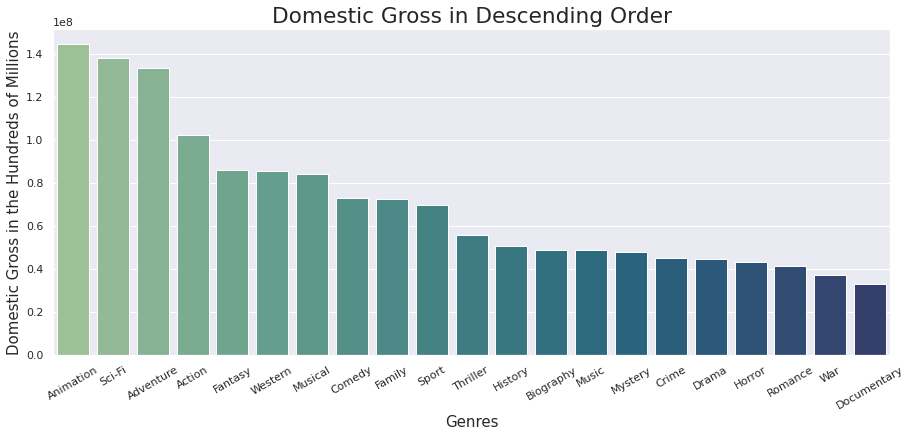

In [30]:
d_gross_ordered = d_gross.sort_values('Mean', ascending = False)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)}) # Sets size of the chart
sns.barplot(x="Genres", y="Mean", data = d_gross_ordered,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Domestic Gross in Descending Order")
plt.xlabel("Genres", size=15)
plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None # Doesn't show the label objects

plt.savefig('images/Domestic_Gross_in_Descending_Order.png', dpi=300, bbox_inches='tight', transparent=False)

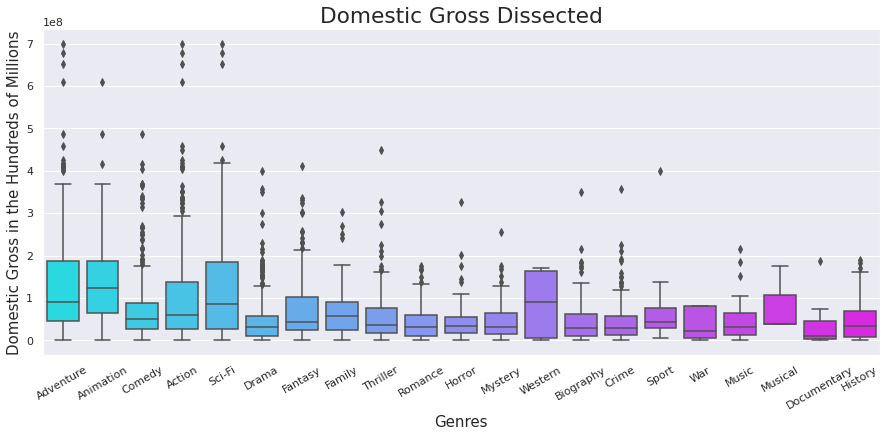

In [31]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x="genres", y="domestic_gross", data = genres_df,
                palette="cool")

sns.set(font_scale = 1.8)
plt.title("Domestic Gross Dissected")
plt.xlabel("Genres", size=15)
plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Domestic_Gross_Boxplot.png', dpi=300, bbox_inches='tight', transparent=False)

## Worldwide Gross


In [32]:
# ww_gross_ordered = ww_gross.sort_values('Mean', ascending = False)

# plt.figure(figsize=(15,6))
# # bar plot with matplotlib
# plt.bar('Genres', 'Mean',data=ww_gross_ordered)
# plt.xlabel("Genres", size=15)
# plt.xticks(rotation=45)
# plt.ylabel("Worldwide Gross in the Hundreds of Millions", size=15)
# plt.title("Worldwide Gross in Descending Order", size=18)

# plt.savefig('images/Worldwide Gross in Descending Order.png', dpi=300, bbox_inches='tight')

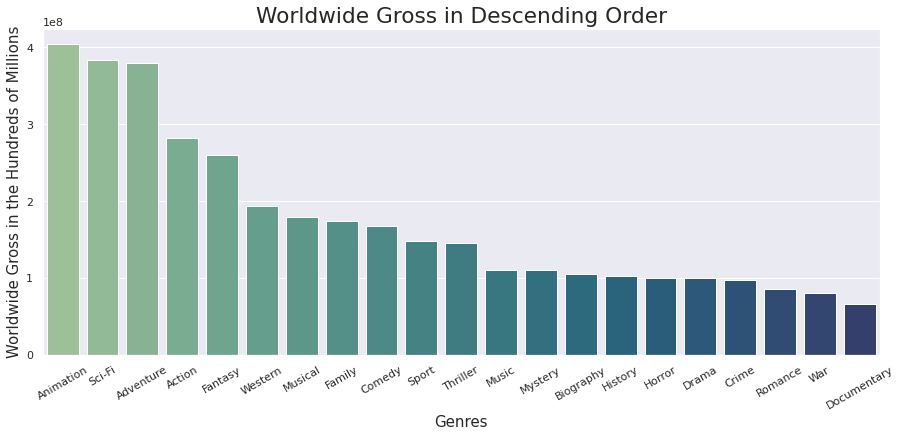

In [33]:
ww_gross_ordered = ww_gross.sort_values('Mean', ascending = False)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)}) # Sets size of the chart
sns.barplot(x="Genres", y="Mean", data = ww_gross_ordered,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Worldwide Gross in Descending Order")
plt.xlabel("Genres", size=15)
plt.ylabel("Worldwide Gross in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Worldwide_Gross_in_Descending_Order.png', dpi=300, bbox_inches='tight', transparent=False)

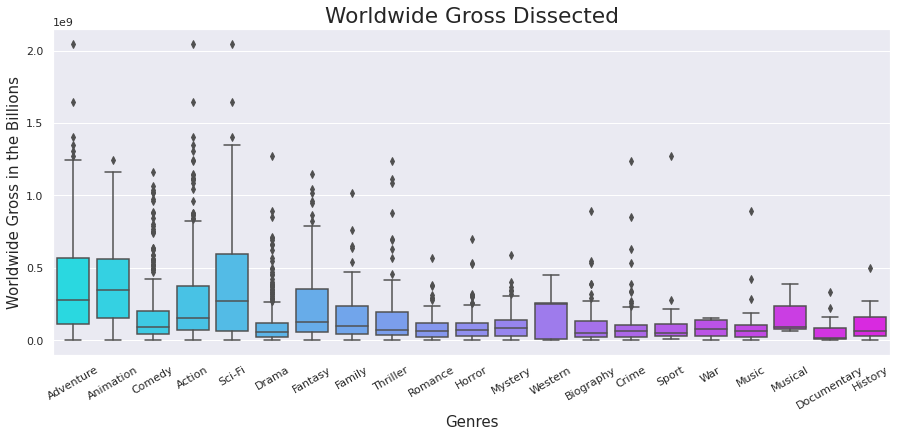

In [34]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x="genres", y="worldwide_gross", data = genres_df,
                palette="cool")

sns.set(font_scale = 1.8)
plt.title("Worldwide Gross Dissected")
plt.xlabel("Genres", size=15)
plt.ylabel("Worldwide Gross in the Billions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Worldwide_Gross_Boxplot.png', dpi=300, bbox_inches='tight', transparent=False)

## Top 10 Movies

In [35]:
# d_movies_ordered = df.sort_values('domestic_gross', ascending = False).head(10)

# plt.figure(figsize=(15,6))
# # bar plot with matplotlib
# plt.bar('title', 'domestic_gross',data=d_movies_ordered)
# plt.xlabel("Title", size=15)
# plt.xticks(rotation=45)
# plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
# plt.title("Top 10 Movies Domestic", size=18)

# plt.savefig('images/Top 10 Movies Domestic.png', dpi=300, bbox_inches='tight')

# top10_domestic = df[['title', 'domestic_gross', 'genres']]
# top10_domestic.sort_values(by='domestic_gross', ascending = False).head(10)

,title,domestic_gross,genres
1067,Black Panther,700059566,"Action,Adventure,Sci-Fi"
1066,Avengers: Infinity War,678815482,"Action,Adventure,Sci-Fi"
696,Jurassic World,652270625,"Action,Adventure,Sci-Fi"
1069,Incredibles 2,608581744,"Action,Adventure,Animation"
835,Finding Dory,486295561,"Adventure,Animation,Comedy"
697,Avengers: Age of Ultron,459005868,"Action,Adventure,Sci-Fi"
307,The Dark Knight Rises,448139099,"Action,Thriller"
447,The Hunger Games: Catching Fire,424668047,"Action,Adventure,Sci-Fi"
1068,Jurassic World: Fallen Kingdom,417719760,"Action,Adventure,Sci-Fi"
0,Toy Story 3,415004880,"Adventure,Animation,Comedy"


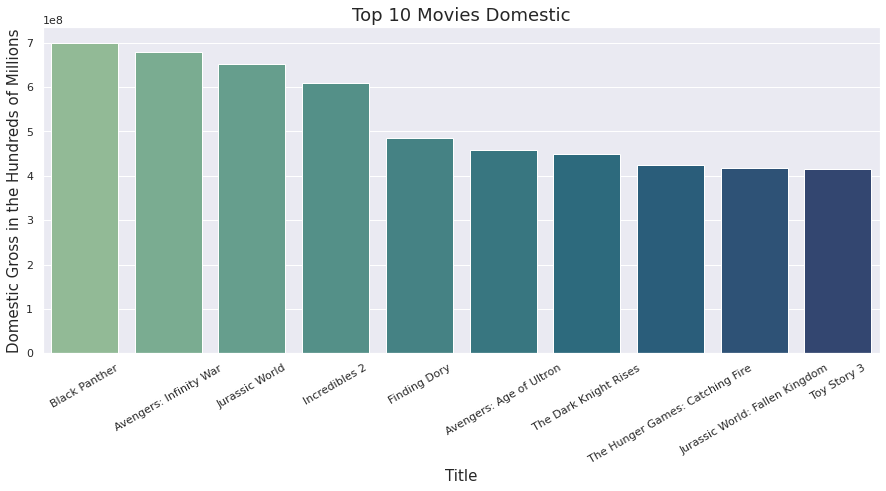

In [36]:
d_movies_ordered = df.sort_values('domestic_gross', ascending = False).head(10)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)}) # Sets size of the chart
sns.barplot(x='title', y='domestic_gross', data = d_movies_ordered,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Top 10 Movies Domestic", size=18)
plt.xlabel("Title", size=15)
plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Top_10_Movies_Domestic.png', dpi=300, bbox_inches='tight', transparent=False)

top10_domestic = df[['title', 'domestic_gross', 'genres']]
top10_domestic.sort_values(by='domestic_gross', ascending = False).head(10)

In [37]:
# w_movies_ordered = df.sort_values('worldwide_gross', ascending = False).head(10)

# plt.figure(figsize=(15,6))
# # bar plot with matplotlib
# plt.bar('title', 'worldwide_gross',data=w_movies_ordered)
# plt.xlabel("Title", size=15)
# plt.xticks(rotation=45)
# plt.ylabel("Worldwide Gross in the Billions", size=15)
# plt.title("Top 10 Movies Worldwide", size=18)

# plt.savefig('images/Top 10 Movies Worldwide.png', dpi=300, bbox_inches='tight')

# top10_worldwide = df[['title', 'worldwide_gross', 'genres']]
# top10_worldwide.sort_values(by='worldwide_gross', ascending = False).head(10)

,title,worldwide_gross,genres
1066,Avengers: Infinity War,2048134200,"Action,Adventure,Sci-Fi"
696,Jurassic World,1648854864,"Action,Adventure,Sci-Fi"
697,Avengers: Age of Ultron,1403013963,"Action,Adventure,Sci-Fi"
1067,Black Panther,1348258224,"Action,Adventure,Sci-Fi"
1068,Jurassic World: Fallen Kingdom,1305772799,"Action,Adventure,Sci-Fi"
444,Frozen,1272469910,"Adventure,Drama,Sport"
1069,Incredibles 2,1242520711,"Action,Adventure,Animation"
967,The Fate of the Furious,1234846267,"Action,Crime,Thriller"
698,Minions,1160336173,"Adventure,Animation,Comedy"
1070,Aquaman,1146894640,"Action,Adventure,Fantasy"


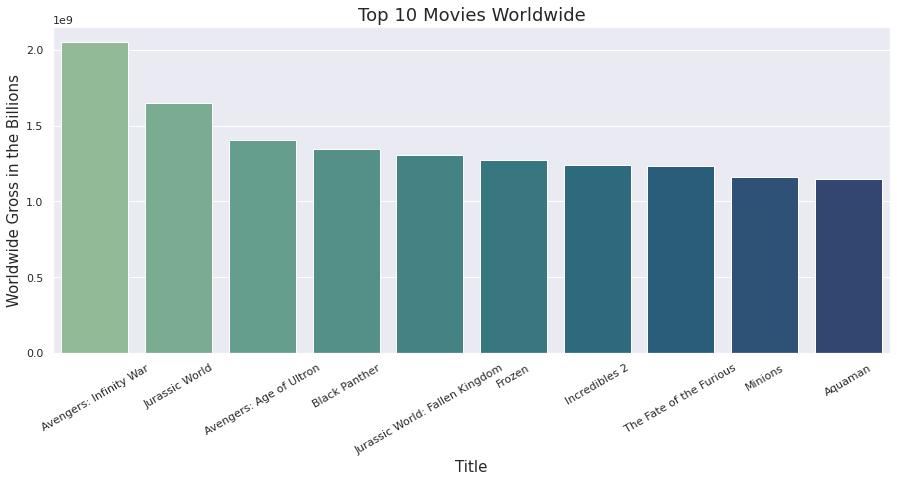

In [38]:
w_movies_ordered = df.sort_values('worldwide_gross', ascending = False).head(10)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='title', y='worldwide_gross', data = w_movies_ordered,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Top 10 Movies Worldwide", size=18)
plt.xlabel("Title", size=15)
plt.ylabel("Worldwide Gross in the Billions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Top_10_Movies_Worldwide.png', dpi=300, bbox_inches='tight', transparent=False)

top10_worldwide = df[['title', 'worldwide_gross', 'genres']]
top10_worldwide.sort_values(by='worldwide_gross', ascending = False).head(10)

# Movie Budgets

In [39]:
# movie_budgets = budgets.sort_values('Mean', ascending = False)

# plt.figure(figsize=(15,6))
# # bar plot with matplotlib
# plt.bar('Genres', 'Mean',data=movie_budgets)
# plt.xlabel("Genres", size=15)
# plt.xticks(rotation=45)
# plt.ylabel("Movie budget in the Hundreds of Millions", size=15)
# plt.title("Movie budgets based on genre", size=18)

# plt.savefig('images/Movie budgets based on genre.png', dpi=300, bbox_inches='tight')

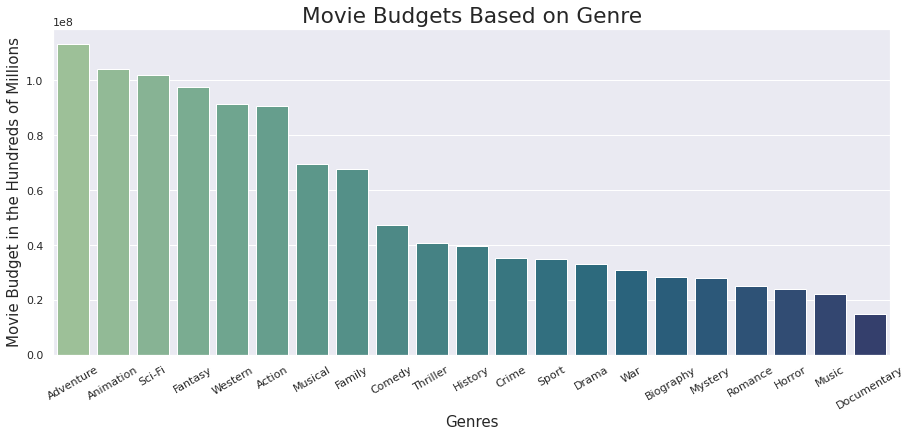

In [40]:
movie_budgets = budgets.sort_values('Mean', ascending = False)

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="Genres", y="Mean", data=movie_budgets,
                palette="crest") #Blues_d

sns.set(font_scale = 1.8)
plt.title("Movie Budgets Based on Genre")
plt.xlabel("Genres", size=15)
plt.ylabel("Movie Budget in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Movie_Budgets_Based_on_Genre.png', dpi=300, bbox_inches='tight', transparent=False)

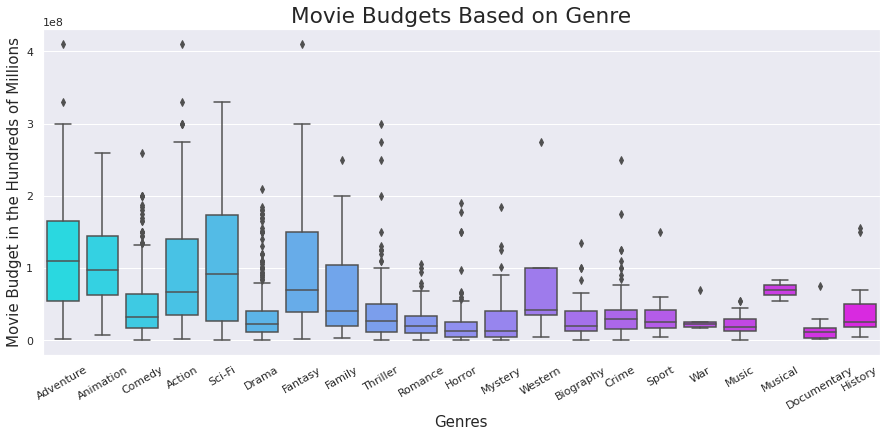

In [41]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x="genres", y="production_budget", data=genres_df,
                palette="cool")

sns.set(font_scale = 1.8)
plt.title("Movie Budgets Based on Genre")
plt.xlabel("Genres", size=15)
plt.ylabel("Movie Budget in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Movie_Budgets_Based_on_Genre_Boxplot.png', dpi=300, bbox_inches='tight', transparent=False)

,title,production_budget,worldwide_gross,domestic_gross,genres
147,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,241063875,"Action,Adventure,Fantasy"
697,Avengers: Age of Ultron,330600000,1403013963,459005868,"Action,Adventure,Sci-Fi"
1066,Avengers: Infinity War,300000000,2048134200,678815482,"Action,Adventure,Sci-Fi"
699,Spectre,300000000,879620923,200074175,"Action,Adventure,Thriller"
976,Justice League,300000000,655945209,229024295,"Action,Adventure,Fantasy"
469,The Lone Ranger,275000000,260002115,89302115,"Action,Adventure,Western"
327,John Carter,275000000,282778100,73058679,"Action,Adventure,Sci-Fi"
307,The Dark Knight Rises,275000000,1084439099,448139099,"Action,Thriller"
1079,Solo: A Star Wars Story,275000000,393151347,213767512,"Action,Adventure,Fantasy"
5,Tangled,260000000,586477240,200821936,"Adventure,Animation,Comedy"


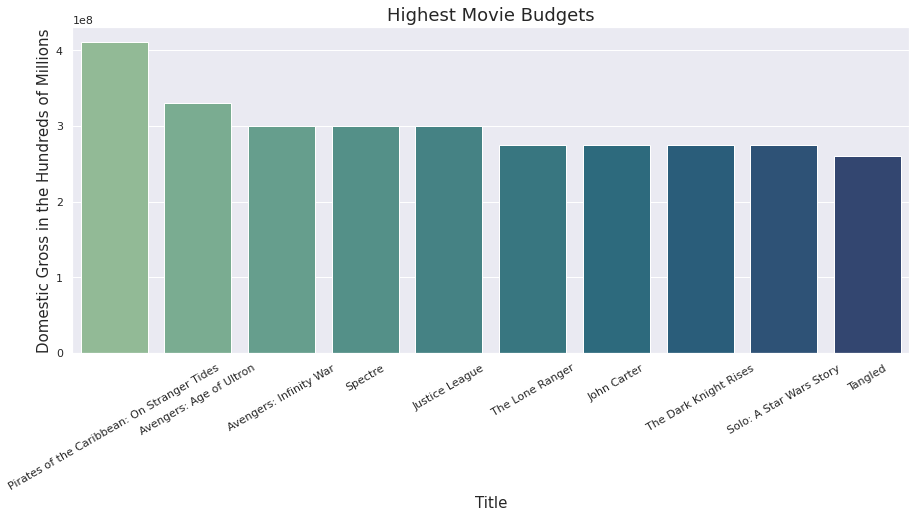

In [42]:
top10_budget = df.sort_values('production_budget', ascending = False).head(10)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)}) # Sets size of the chart
sns.barplot(x='title', y='production_budget', data = top10_budget,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Highest Movie Budgets", size=18)
plt.xlabel("Title", size=15)
plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Highest_Movie_Budgets', dpi=300, bbox_inches='tight', transparent=False)

top10_budgets = df[['title', 'production_budget', 'worldwide_gross', 'domestic_gross', 'genres']]
top10_budgets.sort_values(by='production_budget', ascending = False).head(10)

# Seasons

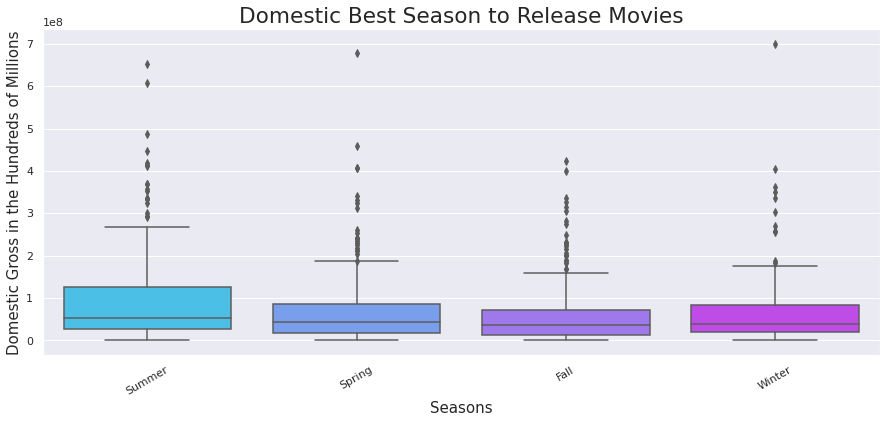

In [43]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x="release_season", y="domestic_gross", data=df,
                palette="cool")

sns.set(font_scale = 1.8)
plt.title("Domestic Best Season to Release Movies")
plt.xlabel("Seasons", size=15)
plt.ylabel("Domestic Gross in the Hundreds of Millions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Best_Season_to_Release_Movies_Domestic.png', dpi=300, bbox_inches='tight', transparent=False)

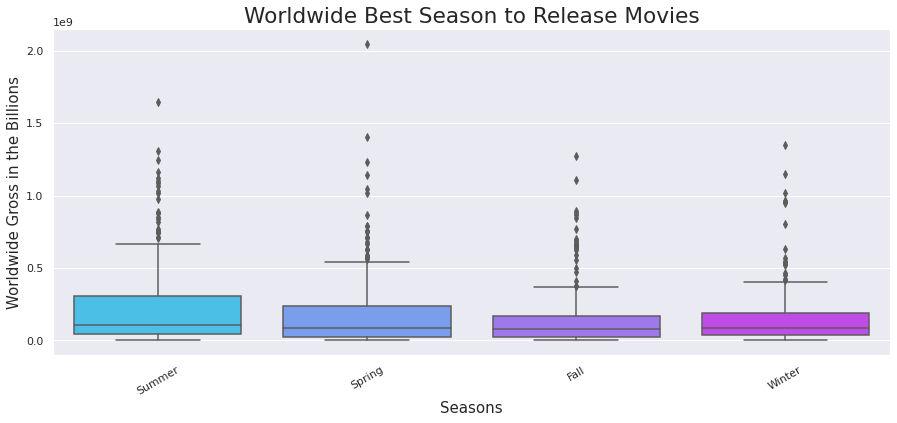

In [44]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x="release_season", y="worldwide_gross", data=df,
                palette="cool")

sns.set(font_scale = 1.8)
plt.title("Worldwide Best Season to Release Movies")
plt.xlabel("Seasons", size=15)
plt.ylabel("Worldwide Gross in the Billions", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Best_Season_to_Release_Movies_Worldwide.png', dpi=300, bbox_inches='tight', transparent=False)

# Sales Ratios

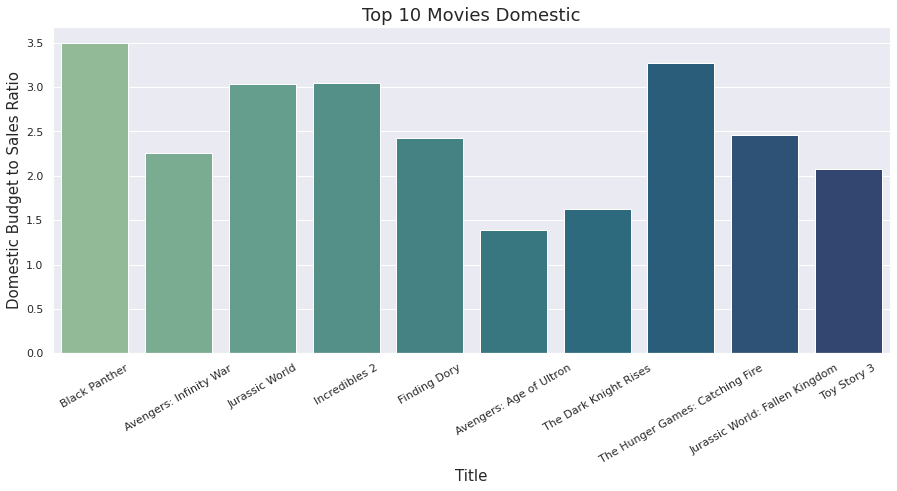

In [45]:
d_ratios_ordered = domestic_ratio.sort_values(by='domestic_gross', ascending = False).head(10)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)}) # Sets size of the chart
sns.barplot(x='title', y='d_sales_ratio', data = d_ratios_ordered,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Top 10 Movies Domestic", size=18)
plt.xlabel("Title", size=15)
plt.ylabel("Domestic Budget to Sales Ratio", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Top_10_Movies_Domestic_Ratio.png', dpi=300, bbox_inches='tight', transparent=False)

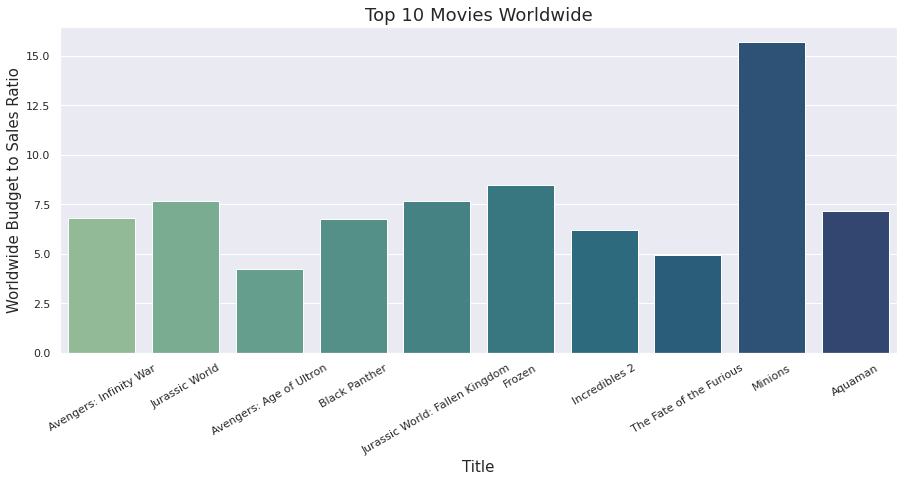

In [46]:
w_ratios_ordered = ww_ratio.sort_values(by='worldwide_gross', ascending = False).head(10)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='title', y='w_sales_ratio', data = w_movies_ordered,
                palette="crest")

sns.set(font_scale = 1.8)
plt.title("Top 10 Movies Worldwide", size=18)
plt.xlabel("Title", size=15)
plt.ylabel("Worldwide Budget to Sales Ratio", size=15)
plt.xticks(rotation = 30)
None

plt.savefig('images/Top_10_Movies_Worldwide_Ratio.png', dpi=300, bbox_inches='tight', transparent=False)